In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d swoyam2609/fresh-and-stale-classification

Dataset URL: https://www.kaggle.com/datasets/swoyam2609/fresh-and-stale-classification
License(s): Community Data License Agreement - Permissive - Version 1.0
 99% 2.82G/2.84G [00:40<00:00, 47.7MB/s]
100% 2.84G/2.84G [00:40<00:00, 75.9MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/fresh-and-stale-classification.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D,Flatten

In [5]:
import os

# Assuming your training data is in '/content/dataset/Train'
train_dir = '/content/dataset/Train'
num_classes = len(os.listdir(train_dir))


In [6]:
#generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/dataset/Train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)

)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/dataset/Test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)

)

Found 23619 files belonging to 18 classes.
Found 6738 files belonging to 14 classes.


In [7]:
#normalize
def process(image, label):
  image = tf.cast(image/255. , tf.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)


In [8]:
#create cnn model

model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3),padding='valid',activation = 'relu',input_shape = (256,256,3)))
model.add(MaxPooling2D(pool_size =(2,2),strides=2,padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3),padding='valid',activation = 'relu',))
model.add(MaxPooling2D(pool_size =(2,2),strides=2,padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3),padding='valid',activation = 'relu',))
model.add(MaxPooling2D(pool_size =(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation= 'relu'))
model.add(Dense(128,activation= 'relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()




/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 18)                  │           2,322 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,857,810 (56.68 MB)

 Trainable params: 14,857,810 (56.68 MB)

 Non-trainable params: 0 (0.00 B)

# New Section

In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [10]:
history = model.fit(train_ds, epochs = 10, validation_data = validation_ds)

Epoch 1/10
739/739 ━━━━━━━━━━━━━━━━━━━━ 114s 136ms/step - accuracy: 0.6493 - loss: 1.1158 - val_accuracy: 0.2419 - val_loss: 10.2132
Epoch 2/10
739/739 ━━━━━━━━━━━━━━━━━━━━ 125s 127ms/step - accuracy: 0.8773 - loss: 0.3227 - val_accuracy: 0.2438 - val_loss: 13.3835
Epoch 3/10
739/739 ━━━━━━━━━━━━━━━━━━━━ 159s 150ms/step - accuracy: 0.9297 - loss: 0.1859 - val_accuracy: 0.2481 - val_loss: 14.4847
Epoch 4/10
739/739 ━━━━━━━━━━━━━━━━━━━━ 130s 135ms/step - accuracy: 0.9541 - loss: 0.1225 - val_accuracy: 0.2502 - val_loss: 17.4184
Epoch 5/10
739/739 ━━━━━━━━━━━━━━━━━━━━ 96s 129ms/step - accuracy: 0.9621 - loss: 0.1061 - val_accuracy: 0.2458 - val_loss: 17.4437
Epoch 6/10
739/739 ━━━━━━━━━━━━━━━━━━━━ 142s 129ms/step - accuracy: 0.9745 - loss: 0.0711 - val_accuracy: 0.2430 - val_loss: 16.1761
Epoch 7/10
739/739 ━━━━━━━━━━━━━━━━━━━━ 94s 127ms/step - accuracy: 0.9746 - loss: 0.0689 - val_accuracy: 0.2465 - val_loss: 18.6605
Epoch 8/10
739/739 ━━━━━━━━━━━━━━━━━━━━ 142s 127ms/step - accuracy: 0.9

In [14]:
import os
import numpy as np

# Assuming you have a list of file paths for test images
test_image_paths = ['/content/Apple-01.jpg']

# Map class indices to class labels based on your training setup
class_index_to_label = {
    0: 'freshapple',
    1: 'freshbanana',
    2: 'freshbittergroud',
    3: 'freshcapsicum',
    4: 'frshcucumber',
    5: 'frshokra',
    6: 'freshoranges',
    7: 'freshpotato',
    8: 'freshtomato',
    9: 'rottenapples',
    10: 'rottenbanana',
    11: 'rottenbittergroud',
    12: 'rottencapsicum',
    13: 'rottencucumber',
    14: 'rottenokra',
    15: 'rotenoranges',
    16: 'rottenpotato',
    17: 'rottentomato',

}

for image_path in test_image_paths:
    img = keras.preprocessing.image.load_img(image_path, target_size=(256, 256))
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create batch axis

    # Make a prediction
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions[0])

    # Map the predicted index to the corresponding class label
    predicted_class_label = class_index_to_label[predicted_class_index]

    print(f"Image: {image_path}, Predicted Class: {predicted_class_label}")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Image: /content/Apple-01.jpg, Predicted Class: rottenapples


In [16]:
import cv2

In [17]:
test_img = cv2.imread('/content/Apple-01.jpg')

In [18]:
plt.imshow(test_img)

NameError: name 'plt' is not defined

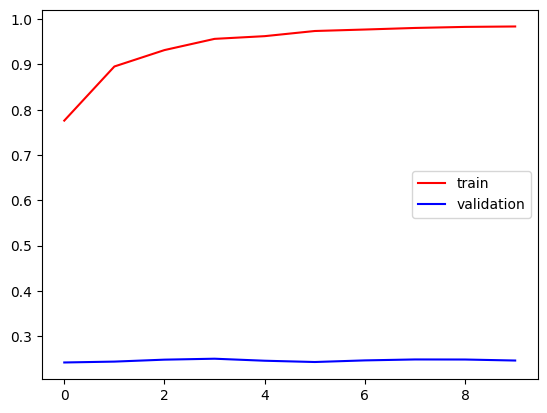

In [19]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label= 'validation')
plt.legend()
plt.show()

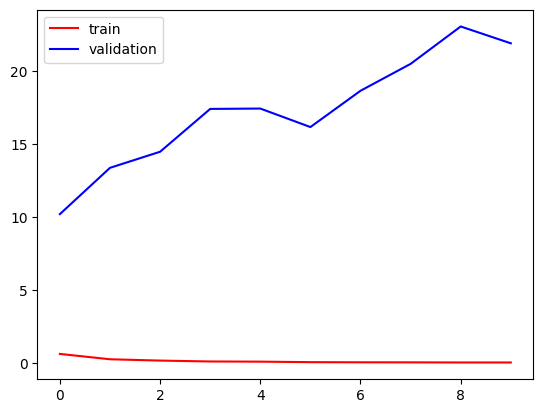

In [20]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label= 'validation')
plt.legend()
plt.show()